# Data Exploration

In [119]:
import numpy as np
import pandas as pd
import matplotlib as plt
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier, XGBRFClassifier
from lightgbm import LGBMClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, f1_score, recall_score, precision_score

In [120]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [121]:
df = pd.read_csv('/content/drive/MyDrive/Brain tumor/BraTS2019_Features.csv')
df.head(2)

,diagnostics_Versions_PyRadiomics,diagnostics_Versions_Numpy,diagnostics_Versions_SimpleITK,diagnostics_Versions_PyWavelet,diagnostics_Versions_Python,diagnostics_Configuration_Settings,diagnostics_Configuration_EnabledImageTypes,diagnostics_Image-original_Hash,diagnostics_Image-original_Dimensionality,diagnostics_Image-original_Spacing,...,original_glszm_SmallAreaLowGrayLevelEmphasis,original_glszm_ZoneEntropy,original_glszm_ZonePercentage,original_glszm_ZoneVariance,original_ngtdm_Busyness,original_ngtdm_Coarseness,original_ngtdm_Complexity,original_ngtdm_Contrast,original_ngtdm_Strength,Diagnosis
0,v3.0.1,1.23.5,2.3.0,1.4.1,3.10.12,"{'minimumROIDimensions': 2, 'minimumROISize': ...",{'Original': {}},33e08f677effad5e6754e93801c0729343666c94,3D,"(1.0, 1.0, 1.0)",...,0.011435,6.144567,0.018463,1.617553e+05,2.252882,0.000957,104.094198,0.005879,0.365346,HGG
1,v3.0.1,1.23.5,2.3.0,1.4.1,3.10.12,"{'minimumROIDimensions': 2, 'minimumROISize': ...",{'Original': {}},73620355b22a3b037d6fc276d63517e4eef37d70,3D,"(1.0, 1.0, 1.0)",...,0.054986,5.252435,0.008486,1.872055e+06,73.989228,0.000336,9.003672,0.004367,0.019459,HGG


In [122]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 334 entries, 0 to 333
Columns: 130 entries, diagnostics_Versions_PyRadiomics to Diagnosis
dtypes: float64(110), int64(2), object(18)
memory usage: 339.3+ KB


In [123]:
df.describe()

,diagnostics_Image-original_Mean,diagnostics_Image-original_Minimum,diagnostics_Image-original_Maximum,diagnostics_Mask-original_VoxelNum,diagnostics_Mask-original_VolumeNum,original_shape_Elongation,original_shape_Flatness,original_shape_LeastAxisLength,original_shape_MajorAxisLength,original_shape_Maximum2DDiameterColumn,...,original_glszm_SmallAreaHighGrayLevelEmphasis,original_glszm_SmallAreaLowGrayLevelEmphasis,original_glszm_ZoneEntropy,original_glszm_ZonePercentage,original_glszm_ZoneVariance,original_ngtdm_Busyness,original_ngtdm_Coarseness,original_ngtdm_Complexity,original_ngtdm_Contrast,original_ngtdm_Strength
count,334.000000,334.0,334.000000,334.000000,334.000000,334.000000,334.000000,334.000000,334.000000,334.000000,...,334.000000,334.000000,334.000000,334.000000,3.340000e+02,334.000000,334.000000,334.000000,3.340000e+02,334.000000
mean,93.421032,0.0,1573.667665,22653.961078,34.386228,0.724622,0.558038,24.615817,45.861937,45.144488,...,346.881097,0.032430,5.638127,0.090118,6.241576e+05,44.338649,0.008501,3975.335095,3.009544e-02,1.257937
std,172.319100,0.0,3580.542966,30993.616517,37.022077,0.155025,0.148290,10.327705,19.698202,16.394693,...,2684.351767,0.049972,1.063026,0.116229,3.458357e+06,538.439360,0.035031,43162.475612,5.662978e-02,7.126713
min,6.609346,0.0,111.000000,47.000000,1.000000,0.222498,0.124907,3.738339,7.287142,8.062258,...,1.078749,0.000039,1.584963,0.000322,5.684114e-01,0.004755,0.000090,0.000411,1.629837e-07,0.000775
25%,45.819204,0.0,670.500000,3889.000000,8.000000,0.641586,0.466905,17.297747,32.733853,33.335023,...,17.816152,0.008616,5.009616,0.025015,2.722105e+03,2.296022,0.000563,16.384190,1.084325e-02,0.051812
50%,57.276499,0.0,853.000000,10456.000000,22.000000,0.743567,0.578939,23.490939,43.940747,43.657760,...,33.251578,0.019447,5.570394,0.055421,2.017099e+04,5.836094,0.001152,39.248217,1.866184e-02,0.138751
75%,80.001316,0.0,1356.500000,25385.250000,48.000000,0.841699,0.663632,30.933781,56.520244,56.080300,...,75.215979,0.035871,6.186526,0.098895,1.010484e+05,14.207237,0.003214,109.543388,2.775808e-02,0.380211
max,1778.219889,0.0,32767.000000,189152.000000,270.000000,0.984177,0.878147,59.587263,171.979417,105.475116,...,44923.941306,0.559769,8.940406,0.770955,4.237417e+07,9818.926992,0.521373,670390.979289,6.787136e-01,106.860586


In [124]:
for column in df.columns:
  print(column)

diagnostics_Versions_PyRadiomics
diagnostics_Versions_Numpy
diagnostics_Versions_SimpleITK
diagnostics_Versions_PyWavelet
diagnostics_Versions_Python
diagnostics_Configuration_Settings
diagnostics_Configuration_EnabledImageTypes
diagnostics_Image-original_Hash
diagnostics_Image-original_Dimensionality
diagnostics_Image-original_Spacing
diagnostics_Image-original_Size
diagnostics_Image-original_Mean
diagnostics_Image-original_Minimum
diagnostics_Image-original_Maximum
diagnostics_Mask-original_Hash
diagnostics_Mask-original_Spacing
diagnostics_Mask-original_Size
diagnostics_Mask-original_BoundingBox
diagnostics_Mask-original_VoxelNum
diagnostics_Mask-original_VolumeNum
diagnostics_Mask-original_CenterOfMassIndex
diagnostics_Mask-original_CenterOfMass
original_shape_Elongation
original_shape_Flatness
original_shape_LeastAxisLength
original_shape_MajorAxisLength
original_shape_Maximum2DDiameterColumn
original_shape_Maximum2DDiameterRow
original_shape_Maximum2DDiameterSlice
original_shape_

In [125]:
df.isnull().sum()

diagnostics_Versions_PyRadiomics    0
diagnostics_Versions_Numpy          0
diagnostics_Versions_SimpleITK      0
diagnostics_Versions_PyWavelet      0
diagnostics_Versions_Python         0
                                   ..
original_ngtdm_Coarseness           0
original_ngtdm_Complexity           0
original_ngtdm_Contrast             0
original_ngtdm_Strength             0
Diagnosis                           0
Length: 130, dtype: int64

In [126]:
df.drop(columns=["diagnostics_Versions_PyRadiomics",
                 "diagnostics_Versions_Numpy",
                 "diagnostics_Versions_SimpleITK",
                 "diagnostics_Versions_PyWavelet",
                 "diagnostics_Versions_Python",
                 "diagnostics_Configuration_Settings",
                 "diagnostics_Configuration_EnabledImageTypes",
                 "diagnostics_Image-original_Hash",
                 "diagnostics_Image-original_Dimensionality",
                 "diagnostics_Image-original_Spacing",
                 "diagnostics_Image-original_Size",
                 "diagnostics_Mask-original_Hash",
                 "diagnostics_Mask-original_Spacing",
                 "diagnostics_Mask-original_Size",
                 "diagnostics_Mask-original_BoundingBox",
                 "diagnostics_Mask-original_CenterOfMassIndex",
                 "diagnostics_Mask-original_CenterOfMass"], inplace=True, axis=1)

In [127]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 334 entries, 0 to 333
Columns: 113 entries, diagnostics_Image-original_Mean to Diagnosis
dtypes: float64(110), int64(2), object(1)
memory usage: 295.0+ KB


In [128]:
df.to_csv("/content/df.csv", index=False)

In [129]:
df.shape

(334, 113)

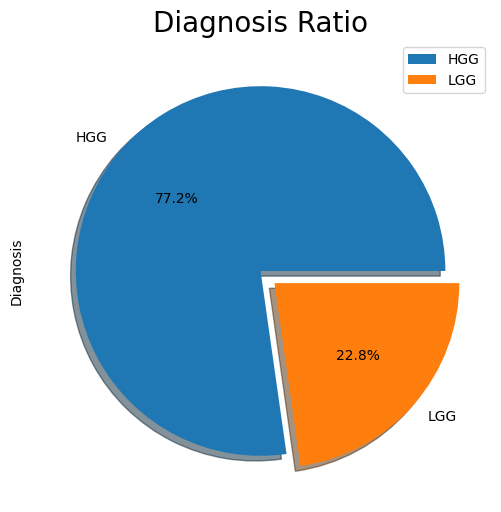

In [130]:
plt.figure(figsize=(13,6))
df['Diagnosis'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',shadow=True)
plt.title("Diagnosis Ratio", fontsize = 20)
plt.legend(['HGG','LGG'])
plt.show()

In [131]:
df.head(2)

,diagnostics_Image-original_Mean,diagnostics_Image-original_Minimum,diagnostics_Image-original_Maximum,diagnostics_Mask-original_VoxelNum,diagnostics_Mask-original_VolumeNum,original_shape_Elongation,original_shape_Flatness,original_shape_LeastAxisLength,original_shape_MajorAxisLength,original_shape_Maximum2DDiameterColumn,...,original_glszm_SmallAreaLowGrayLevelEmphasis,original_glszm_ZoneEntropy,original_glszm_ZonePercentage,original_glszm_ZoneVariance,original_ngtdm_Busyness,original_ngtdm_Coarseness,original_ngtdm_Complexity,original_ngtdm_Contrast,original_ngtdm_Strength,Diagnosis
0,63.008830,0.0,1043.0,27189,115,0.739545,0.687078,30.967202,45.070872,57.428216,...,0.011435,6.144567,0.018463,1.617553e+05,2.252882,0.000957,104.094198,0.005879,0.365346,HGG
1,42.644644,0.0,726.0,45839,108,0.712809,0.693697,39.632601,57.132479,64.884513,...,0.054986,5.252435,0.008486,1.872055e+06,73.989228,0.000336,9.003672,0.004367,0.019459,HGG


# Preprocessing

In [132]:
X=df.drop(columns=['Diagnosis'],axis=1)

In [133]:
le=LabelEncoder()
Y=le.fit_transform(df['Diagnosis'])

In [134]:
Y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [135]:
sc=StandardScaler()
sc.fit(X)
X=sc.transform(X)

In [136]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state = 42)

In [140]:
print(f"X_train Shape: {X_train.shape}")
print(f"y_train Shape: {y_train.shape}")
print(f"X_test Shape: {X_test.shape}")
print(f"X_test Shape: {y_test.shape}")

X_train Shape: (267, 112)
y_train Shape: (267,)
X_test Shape: (67, 112)
X_test Shape: (67,)


# Machine Learning

In [141]:
# creating list of K for KNN
k_list = list(range(1,50,2))
# creating list of cv scores
cv_scores = []

# perform 5-fold cross validation
for k in k_list:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=5, scoring='accuracy')
    cv_scores.append(scores.mean())

In [142]:
# changing to misclassification error
MSE = [1 - x for x in cv_scores]
# finding best k
best_k = k_list[MSE.index(min(MSE))]
print("The optimal number of neighbors is %d." % best_k)

The optimal number of neighbors is 7.


In [143]:
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train, y_train)
knn_pred = knn.predict(X_test)
accuracies = cross_val_score(estimator = knn, X = X_train, y = y_train, cv = 10)
train_knn = knn.score(X_train , y_train)*100
print(f"Train score:{(train_knn):.2f}")
test_knn = knn.score(X_test , y_test)*100
print(f"Test score:{(test_knn):.2f}")
kfold_knn = np.mean(accuracies)*100
print(f"K-fold accuracy:{(kfold_knn):.2f}")
Kfold_Std_knn = accuracies.std()*100
print(f"Standard Deviation:{(Kfold_Std_knn):.2f}")
f1_knn = f1_score(y_test , knn_pred)*100
print(f"F1 Score: {f1_knn:.2f}")
re_knn = recall_score(y_test , knn_pred)*100
print(f"Recall Score: {re_knn:.2f}")
pre_knn = precision_score(y_test , knn_pred)*100
print(f"Precision Score: {pre_knn:.2f}")
acc_knn = accuracies.mean()*100
print(f"Accuracy:{(acc_knn):.2f}")
#print(classification_report(y_test, knn_pred))
#sns.heatmap(confusion_matrix(y_test,knn_pred), annot= True, fmt= 'g')

Train score:87.64
Test score:83.58
K-fold accuracy:85.75
Standard Deviation:5.55
F1 Score: 64.52
Recall Score: 52.63
Precision Score: 83.33
Accuracy:85.75


In [144]:
lgr = LogisticRegression()
lgr.fit(X_train, y_train)
lgr_pred = lgr.predict(X_test)
accuracies = cross_val_score(estimator = lgr, X = X_train, y = y_train, cv = 10)
train_lgr = lgr.score(X_train , y_train)*100
print(f"Train score:{(train_lgr):.2f}")
test_lgr = lgr.score(X_test , y_test)*100
print(f"Test score:{(test_lgr):.2f}")
kfold_lgr = np.mean(accuracies)*100
print(f"K-fold accuracy:{(kfold_lgr):.2f}")
Kfold_Std_lgr = accuracies.std()*100
print(f"Standard Deviation:{(Kfold_Std_lgr):.2f}")
f1_lgr = f1_score(y_test , lgr_pred)*100
print(f"F1 Score: {f1_lgr:.2f}")
re_lgr = recall_score(y_test , lgr_pred)*100
print(f"Recall Score: {re_lgr:.2f}")
pre_lgr = precision_score(y_test , lgr_pred)*100
print(f"Precision Score: {pre_lgr:.2f}")
acc_lgr = accuracies.mean()*100
print(f"Accuracy:{(acc_lgr):.2f}")
#print(classification_report(y_test, lgr_pred))
#sns.heatmap(confusion_matrix(y_test,lgr_pred), annot= True, fmt= 'g')

Train score:95.88
Test score:91.04
K-fold accuracy:90.28
Standard Deviation:4.16
F1 Score: 81.25
Recall Score: 68.42
Precision Score: 100.00
Accuracy:90.28


# Feature Selection- Dropping Constant Features Using Threshold

In [166]:
X=df.drop(labels=['Diagnosis'],axis=1)
Y=df['Diagnosis']

In [167]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X,Y,test_size=0.2,random_state=0)

In [168]:
print(f"X_train Shape: {X_train.shape}")
print(f"y_train Shape: {y_train.shape}")
print(f"X_test Shape: {X_test.shape}")
print(f"X_test Shape: {y_test.shape}")

X_train Shape: (267, 112)
y_train Shape: (267,)
X_test Shape: (67, 112)
X_test Shape: (67,)


In [171]:
from sklearn.feature_selection import VarianceThreshold
var_thres=VarianceThreshold(threshold=0.05)
var_thres.fit(X_train)

VarianceThreshold(threshold=0.05)

In [172]:
var_thres.get_support()

array([ True, False,  True,  True,  True, False, False,  True,  True,
        True,  True,  True,  True,  True,  True, False,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True, False,
        True,  True,  True,  True,  True,  True, False,  True,  True,
        True, False, False, False, False, False, False, False,  True,
       False,  True, False, False,  True,  True,  True,  True,  True,
       False,  True,  True,  True,  True,  True,  True,  True, False,
       False,  True, False,  True, False,  True,  True,  True,  True,
        True, False,  True,  True, False, False,  True, False,  True,
       False,  True, False,  True,  True,  True,  True,  True, False,
        True, False, False,  True, False,  True, False,  True,  True,
       False,  True, False,  True])

In [173]:
## Finding non constant features
sum(var_thres.get_support())

78

In [174]:
## Finding constant features
constant_columns=[column for column in X_train.columns
                  if column not in X_train.columns[var_thres.get_support()]]
print(len(constant_columns))

34


In [175]:
for column in constant_columns:
  print(column)

diagnostics_Image-original_Minimum
original_shape_Elongation
original_shape_Flatness
original_shape_Sphericity
original_firstorder_Uniformity
original_glcm_Correlation
original_glcm_Id
original_glcm_Idm
original_glcm_Idmn
original_glcm_Idn
original_glcm_Imc1
original_glcm_Imc2
original_glcm_InverseVariance
original_glcm_JointEnergy
original_glcm_MCC
original_glcm_MaximumProbability
original_gldm_DependenceNonUniformityNormalized
original_gldm_LowGrayLevelEmphasis
original_gldm_SmallDependenceEmphasis
original_gldm_SmallDependenceLowGrayLevelEmphasis
original_glrlm_GrayLevelNonUniformityNormalized
original_glrlm_LowGrayLevelRunEmphasis
original_glrlm_RunLengthNonUniformityNormalized
original_glrlm_RunPercentage
original_glrlm_ShortRunEmphasis
original_glrlm_ShortRunLowGrayLevelEmphasis
original_glszm_GrayLevelNonUniformityNormalized
original_glszm_LowGrayLevelZoneEmphasis
original_glszm_SizeZoneNonUniformityNormalized
original_glszm_SmallAreaEmphasis
original_glszm_SmallAreaLowGrayLevel

**Model Building**

In [176]:
X.drop(constant_columns,axis=1,inplace = True)

In [177]:
X.shape

(334, 78)

In [179]:
le=LabelEncoder()
Y=le.fit_transform(df['Diagnosis'])

In [180]:
sc=StandardScaler()
sc.fit(X)
X=sc.transform(X)

In [181]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state = 42)

In [182]:
print(f"X_train Shape: {X_train.shape}")
print(f"y_train Shape: {y_train.shape}")
print(f"X_test Shape: {X_test.shape}")
print(f"X_test Shape: {y_test.shape}")

X_train Shape: (267, 78)
y_train Shape: (267,)
X_test Shape: (67, 78)
X_test Shape: (67,)


In [184]:
lgr = LogisticRegression()
lgr.fit(X_train, y_train)
lgr_pred = lgr.predict(X_test)
accuracies = cross_val_score(estimator = lgr, X = X_train, y = y_train, cv = 10)
train_lgr = lgr.score(X_train , y_train)*100
print(f"Train score:{(train_lgr):.2f}")
test_lgr = lgr.score(X_test , y_test)*100
print(f"Test score:{(test_lgr):.2f}")
kfold_lgr = np.mean(accuracies)*100
print(f"K-fold accuracy:{(kfold_lgr):.2f}")
Kfold_Std_lgr = accuracies.std()*100
print(f"Standard Deviation:{(Kfold_Std_lgr):.2f}")
f1_lgr = f1_score(y_test , lgr_pred)*100
print(f"F1 Score: {f1_lgr:.2f}")
re_lgr = recall_score(y_test , lgr_pred)*100
print(f"Recall Score: {re_lgr:.2f}")
pre_lgr = precision_score(y_test , lgr_pred)*100
print(f"Precision Score: {pre_lgr:.2f}")
acc_lgr = accuracies.mean()*100
print(f"Accuracy:{(acc_lgr):.2f}")
#print(classification_report(y_test, lgr_pred))
#sns.heatmap(confusion_matrix(y_test,lgr_pred), annot= True, fmt= 'g')

Train score:94.76
Test score:89.55
K-fold accuracy:92.14
Standard Deviation:4.59
F1 Score: 77.42
Recall Score: 63.16
Precision Score: 100.00
Accuracy:92.14
